<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


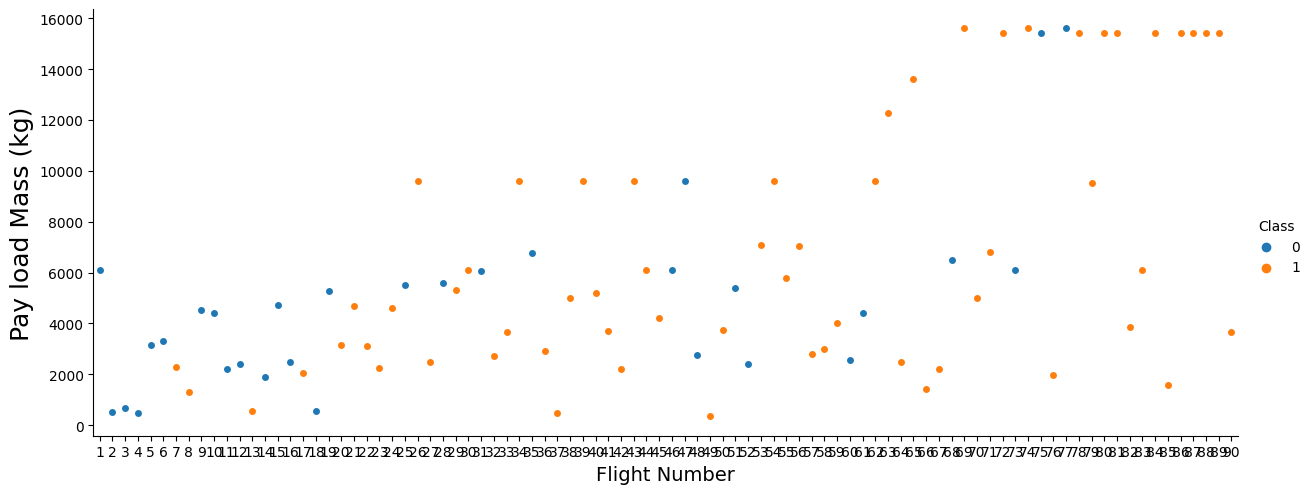

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=2.5)
plt.xlabel("Flight Number",fontsize=14)
plt.ylabel("Pay load Mass (kg)",fontsize=18)

fignum = 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


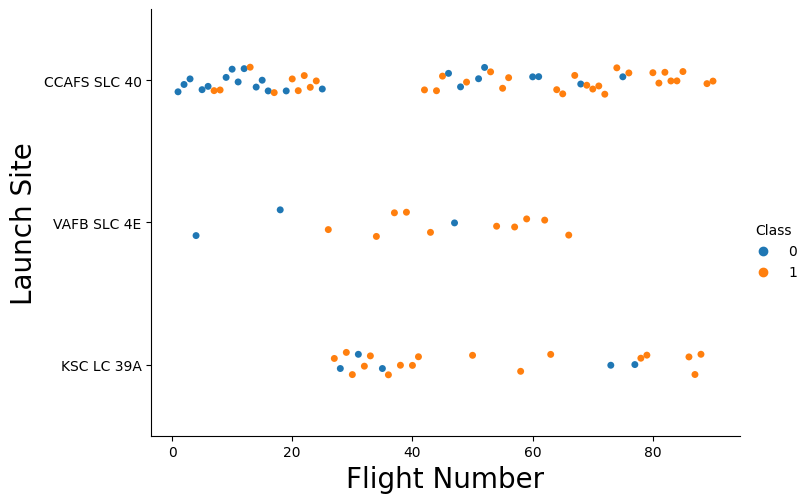

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class", aspect=1.5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

fignum += 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

**Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.**

We infer from the scatter plot that more flights lead to a better success rate at any given launch site. Seems a fair example of _learning from experience_.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


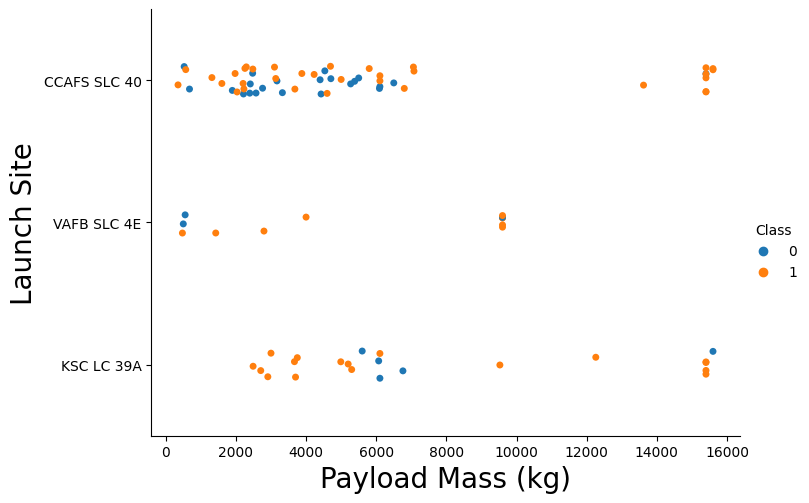

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", aspect=1.5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

fignum += 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

**Explanation.** We can clearly distinguish in the launch site CCAFS SLC-40 a higher success rate for high values of payload mass.
<br>Other launch sites have no clear pattern, except some obvious clusters of data, probably due to well-stablished flight requirements.

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [6]:
# Visualize the relationship between success rate of each orbit type.
# Next, we want to visually check if there are any relationship between success rate and orbit type.
# Let's create a `bar chart` for the sucess rate of each orbit.
# HINT use groupby method on Orbit column and get the mean of Class column

success_per_orbit = df.groupby("Orbit")["Class"].mean()
count_per_orbit = df.groupby("Orbit")["Class"].count()

Orbit
ES-L1    1.000000
GEO      1.000000
HEO      1.000000
SSO      1.000000
VLEO     0.857143
LEO      0.714286
MEO      0.666667
PO       0.666667
ISS      0.619048
GTO      0.518519
SO       0.000000
Name: Class, dtype: float64


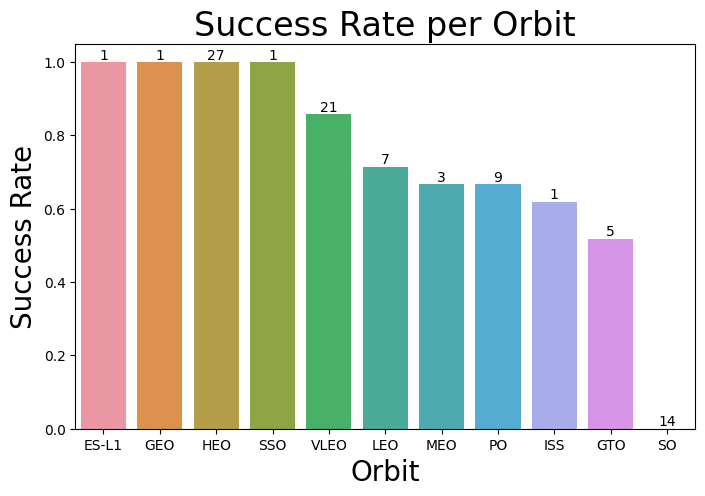

In [7]:
# Sort the values in descending order:
success_per_orbit = success_per_orbit.sort_values(ascending=False)
print(success_per_orbit)

# Plot the bar chart, using count_per_orbit as annotation:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=success_per_orbit.index, y=success_per_orbit.values, ax=ax)
ax.set_xlabel("Orbit", fontsize=20)
ax.set_ylabel("Success Rate", fontsize=20)
ax.set_title("Success Rate per Orbit", fontsize=24)
ax.bar_label(ax.containers[0], labels=count_per_orbit.values, fmt="%.0f", label_type="edge")



fignum += 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

**Comments.** From the graph we infer that some orbits tend to be more reliable, while others impose a greater challenge to control.
<br>the low count on top of each bar illustrates that we have too few data points to come to solid conclusions here.

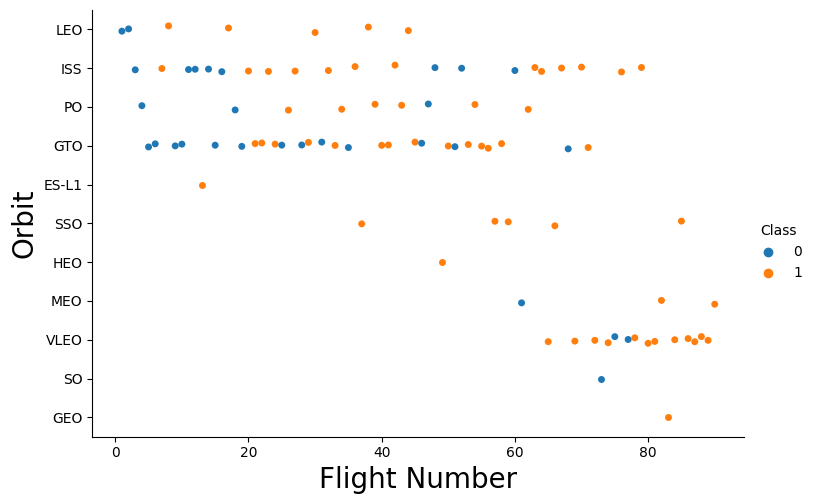

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(data=df, x="FlightNumber", y="Orbit", hue="Class", aspect=1.5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)

fignum += 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

**Comments.** We can observe that some orbits are strongly bounded to the number of flights, whereas GTO, VLEO and ISS
<br>have unexpected regions of failure, possibly due to different climate stress conditions specific to that period.

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


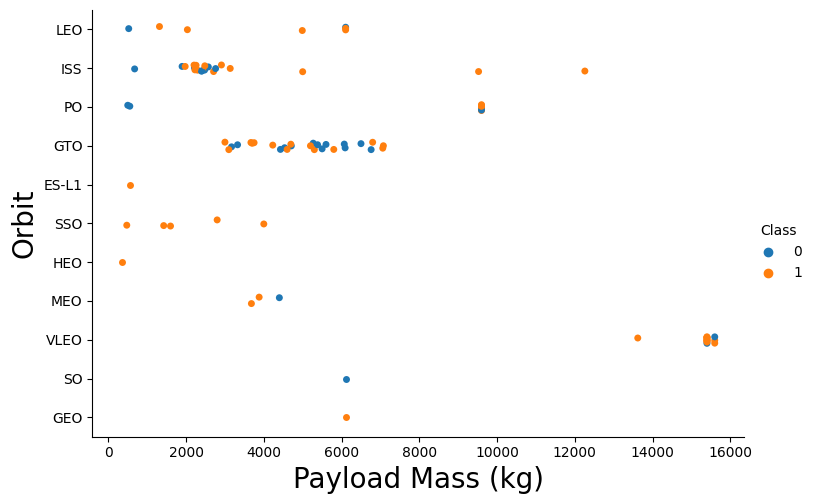

In [9]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(data=df, x="PayloadMass", y="Orbit", hue="Class", aspect=1.5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)

fignum += 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

**Comments.** We can see that for some orbits, failures abound in the extremes, whereas for GTO, for example, the failures are more evenly
<br>distributed. It indicates that the payload mass has limited influence and other factors should be considered in a more detailed analysis.

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
def extract_years(df:pd.DataFrame, col="Date") -> pd.Series:
    # BAD:
    # year = []
    # for i in df["Date"]:
    #     year.append(i.split("-")[0])

    # pandas extract year from date column:
    years = df[col].str.split("-", expand=True)[0].astype(int)
    return years

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df["Year"] = extract_years(df, "Date")

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


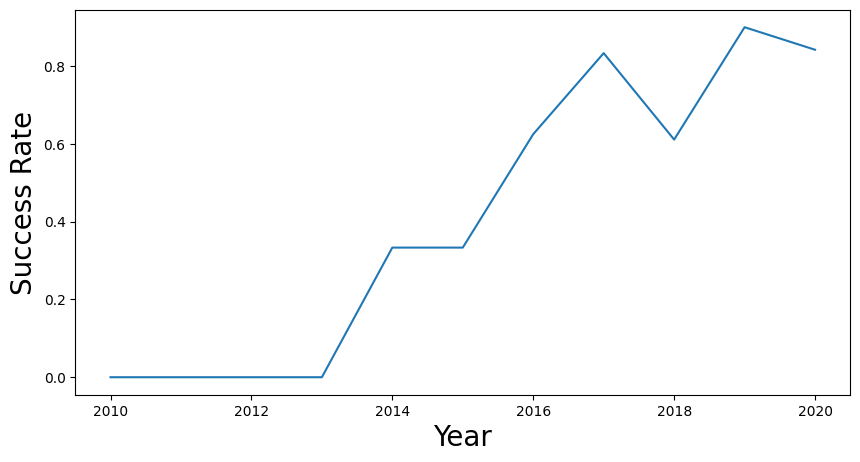

In [12]:
# observe that the sucess rate since 2013 kept increasing till 2020:

success_per_year = df.groupby("Year")["Class"].mean()
success_per_year.plot(kind="line", figsize=(10, 5))
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)

fignum += 1
plt.savefig(f'./final-presentation-assignment/images/eda-dataviz-{fignum:02d}.png')
plt.show()

**Comments.** A rather inspiring graph. We can see that the success rate has been steadily increasing since 2013, stabilizing
<br>at around 80% in 2020. It is a good sign that the company is learning from experience and improving its performance.

In [13]:
# cols = 'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial'
cols = "FlightNumber PayloadMass Orbit LaunchSite Flights GridFins Reused Legs LandingPad Block ReusedCount Serial".split()
features = df[cols]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder
<br>to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>.
<br>Assign the value to the variable <code>features_one_hot</code>, display the results using the method head.
<br>Your result dataframe must include all features including the encoded ones.


In [14]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

In [15]:
# FlightNumber PayloadMass Orbit LaunchSite Flights GridFins Reused Legs LandingPad Block ReusedCount Serial
should_encode = "Orbit LaunchSite LandingPad Serial".split()
features_one_hot = [features[c] for c in features.columns if c not in should_encode]
for col in should_encode:
    features_one_hot.append(pd.get_dummies(features[col], prefix=col))
features_one_hot = pd.concat(features_one_hot, axis=1)

features_one_hot.shape

(90, 80)

In [16]:
for u, v in zip(features_one_hot.columns, features_one_hot.dtypes):
    print(f"{u:>15s} => {v}")

   FlightNumber => int64
    PayloadMass => float64
        Flights => int64
       GridFins => bool
         Reused => bool
           Legs => bool
          Block => float64
    ReusedCount => int64
    Orbit_ES-L1 => uint8
      Orbit_GEO => uint8
      Orbit_GTO => uint8
      Orbit_HEO => uint8
      Orbit_ISS => uint8
      Orbit_LEO => uint8
      Orbit_MEO => uint8
       Orbit_PO => uint8
       Orbit_SO => uint8
      Orbit_SSO => uint8
     Orbit_VLEO => uint8
LaunchSite_CCAFS SLC 40 => uint8
LaunchSite_KSC LC 39A => uint8
LaunchSite_VAFB SLC 4E => uint8
LandingPad_5e9e3032383ecb267a34e7c7 => uint8
LandingPad_5e9e3032383ecb554034e7c9 => uint8
LandingPad_5e9e3032383ecb6bb234e7ca => uint8
LandingPad_5e9e3032383ecb761634e7cb => uint8
LandingPad_5e9e3033383ecbb9e534e7cc => uint8
   Serial_B0003 => uint8
   Serial_B0005 => uint8
   Serial_B0007 => uint8
   Serial_B1003 => uint8
   Serial_B1004 => uint8
   Serial_B1005 => uint8
   Serial_B1006 => uint8
   Serial_B1007 => uint8
   

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [17]:
# Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64.

features_one_hot = features_one_hot.astype("float64")
features_one_hot.to_csv('dataset_part_3.csv', index=False)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [18]:
!dir *.csv

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � 9456-BAD2

 Pasta de c:\Users\DXW4\OneDrive - PETROBRAS\Documentos\COURSERA\IBM-SKILLS-NETWORK\ibm-applied-data-science-capstone

30/01/2023  17:38            12.100 dataset_part_2.csv
30/01/2023  19:47            30.427 dataset_part_3.csv
27/01/2023  15:01            11.819 Spacex.csv
30/01/2023  18:15             7.710 spacex_launch_geo (1).csv
27/01/2023  17:57             7.710 spacex_launch_geo.csv
               5 arquivo(s)         69.766 bytes
               0 pasta(s)   125.315.715.072 bytes dispon�veis


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
